# 1. Sebuah platform e-commerce telah merekap [data transaksi](https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json). Platform tersebut ingin mendapatkan informasi berikut:
- Jumlah nilai transaksi per hari.

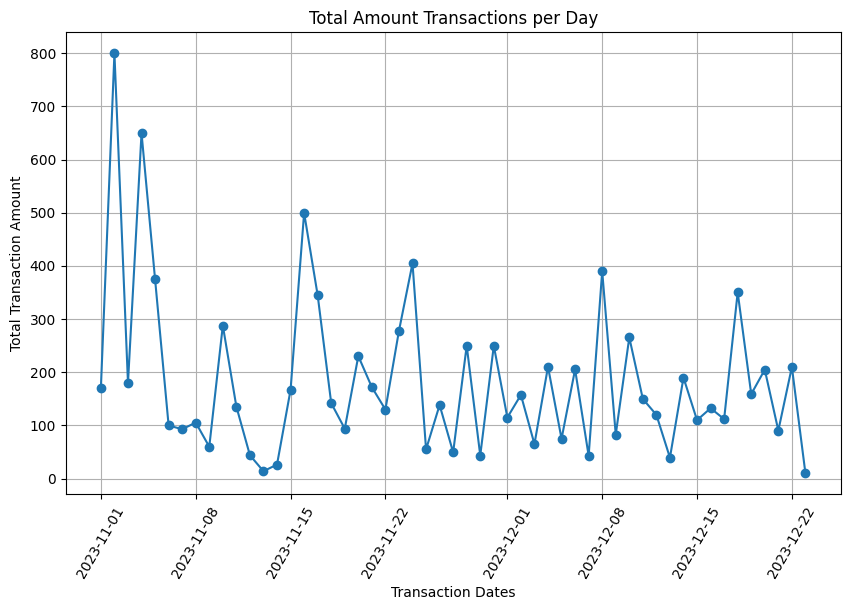

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests

url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
response = requests.get(url)
data = response.json()

df_transaction = pd.DataFrame(data)
df_transaction.set_index("transaction_id", inplace=True)

df_transaction["transaction_date"] = pd.to_datetime(df_transaction["transaction_date"], format='%d-%m-%Y')

transaction_sum_day = df_transaction.groupby(["transaction_date"]).sum(numeric_only=True)

transaction_dates = transaction_sum_day.index.get_level_values(0).tolist()
total_amount = transaction_sum_day["transaction_amount"]

plt.figure(figsize=(10, 6))
plt.plot(transaction_dates, total_amount, marker="o")
plt.title("Total Amount Transactions per Day")
plt.xlabel("Transaction Dates")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

- Kategori barang yang paling banyak dibeli.

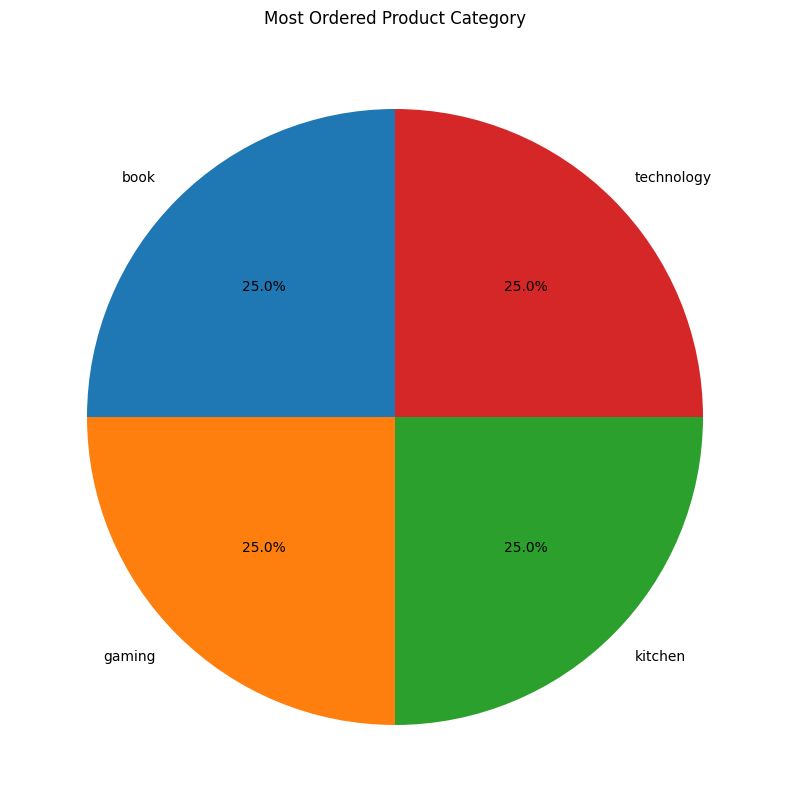

In [92]:
category_product = df_transaction.groupby(["item_category"]).count()

category_name = category_product.index.get_level_values(0).tolist()
category_count = category_product["transaction_date"]

plt.figure(figsize=(10, 10))
plt.pie(
    category_count, 
    labels=category_name,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Most Ordered Product Category")
plt.show()

- Jumlah nilai transaksi dengan metode pembayaran e-wallet.

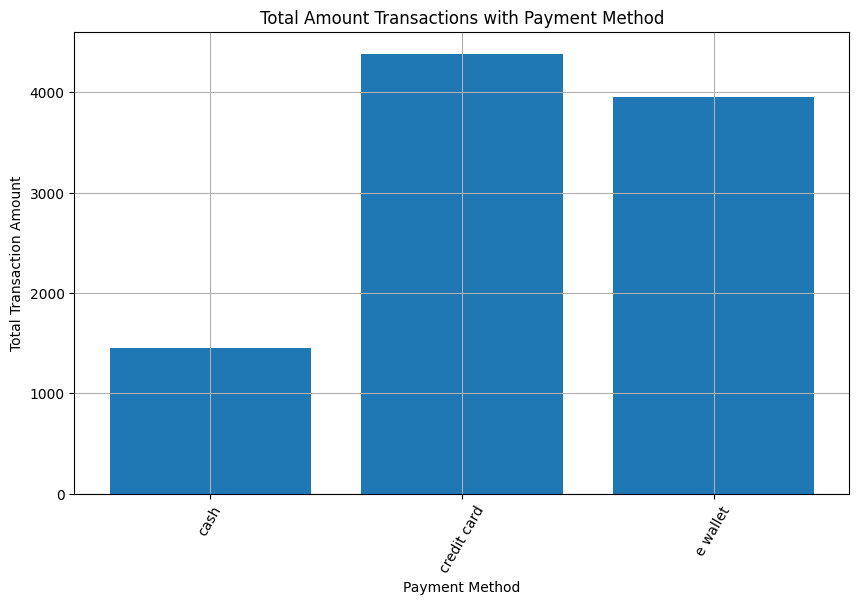

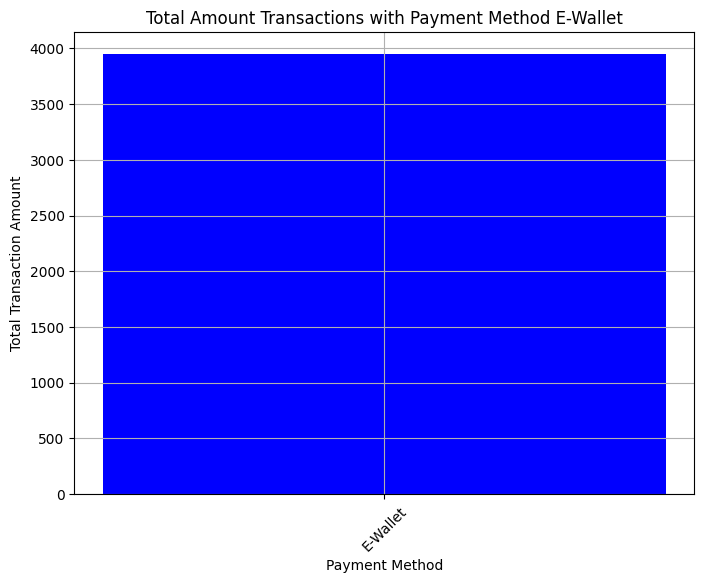

In [93]:
# Cara 1
payment_method_transaction = df_transaction.groupby(["payment_method"]).sum(numeric_only=True)

payment_method = payment_method_transaction.index.get_level_values(0).tolist()
total_amount_method = payment_method_transaction["transaction_amount"]

plt.figure(figsize=(10, 6))
plt.bar(payment_method, total_amount_method)
plt.title("Total Amount Transactions with Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

# cara 2
ewallet_transactions = df_transaction[df_transaction["payment_method"] == "e wallet"]
total_ewallet_amount = ewallet_transactions["transaction_amount"].sum()

plt.figure(figsize=(8, 6))
plt.bar("E-Wallet", total_ewallet_amount, color="blue")
plt.title("Total Amount Transactions with Payment Method E-Wallet")
plt.xlabel("Payment Method")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Nilai maksimal, nilai minimal dan nilai tengah dari jumlah nilai transaksi yang dilakukan.

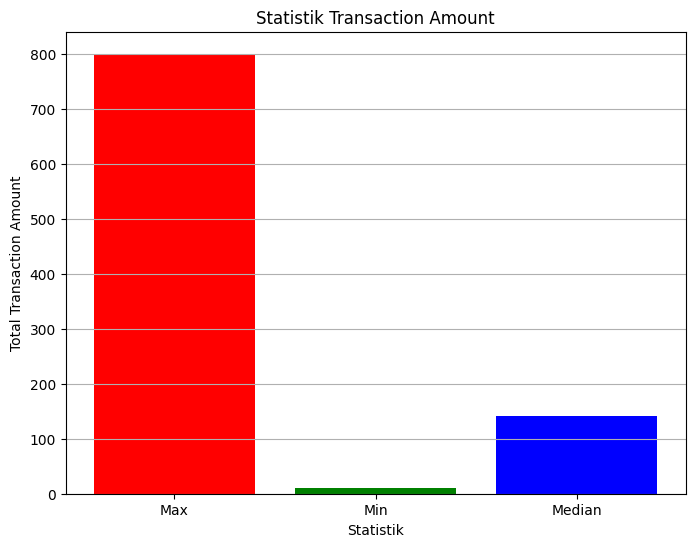

In [94]:
transaction_date_result = df_transaction.groupby(["transaction_date"]).sum(numeric_only=True)

max_transaction_amount = transaction_date_result['transaction_amount'].max()
min_transaction_amount = transaction_date_result['transaction_amount'].min()
median_transaction_amount = transaction_date_result['transaction_amount'].median()

plt.figure(figsize=(8, 6))
plt.bar(['Max', 'Min', 'Median'], [max_transaction_amount, min_transaction_amount, median_transaction_amount], color=['red', 'green', 'blue'])
plt.title('Statistik Transaction Amount')
plt.xlabel('Statistik')
plt.ylabel('Total Transaction Amount')
plt.grid(axis='y')
plt.show()

# 2. Sebuah survei mengenai pengembangan software telah dilakukan dan didapatkan data sebagai [berikut](https://gist.github.com/nadirbslmh/5e574e92cff796bc5c4c187ad5af51ba). Buatlah data visualization untuk memperoleh berbagai informasi berikut:

## Proses Transformasi Data Source

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df_survey = pd.read_csv(r"D:\Alterra Academy\tugas\data_ika-purwanti\20_Data-Visualization\praktikum\source\survey.csv")

# ubah value pada data umur
df_survey.loc[df_survey['age'] == "19", "age"] = "17-20"

# menghapus data duplikat
df_survey = df_survey.drop_duplicates()

# menghapus data tidak lengkap
df_survey = df_survey.replace("-", pd.NA)
df_survey  = df_survey.dropna(subset=["age", "favorite_front_end", "favorite_back_end", "salary_per_year_in_USD"], how="any")
    
df_survey = df_survey.reset_index(drop=True)
df_survey

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,17-20,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Mia Green,26-30,Angular,Java,10000 - 25000,government
5,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house
6,Olivia Robinson,17-20,React,Node.js,26000 - 40000,freelance
7,Noah Rodriguez,21-25,Vue.js,Python,41000 - 60000,software house
8,Aiden Martinez,31-40,Angular,C#,more than 60000,fintech
9,Ava Walker,17-20,JavaScript,PHP,26000 - 40000,software house


- Persentase responden berdasarkan umur.

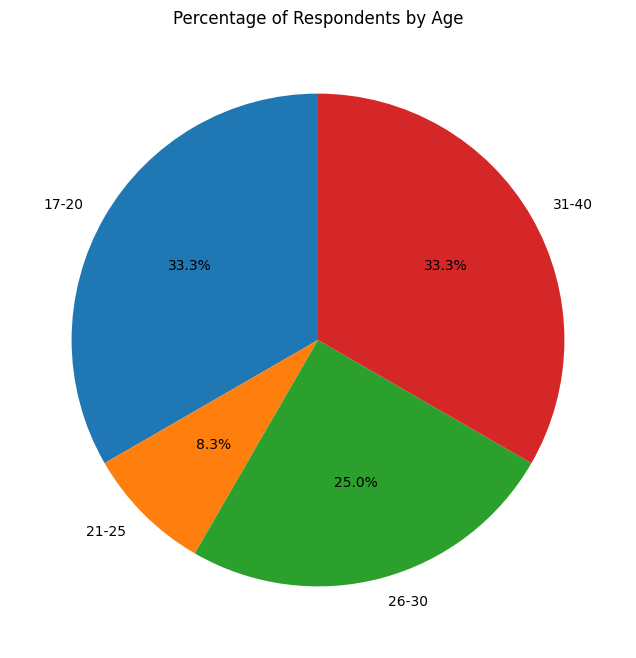

In [96]:
respondend_age_result = df_survey.groupby(["age"]).count()

range_age = respondend_age_result.index.get_level_values(0).tolist()
range_age_count = respondend_age_result["name"]

plt.figure(figsize=(8, 8))
plt.pie(
    range_age_count, 
    labels=range_age,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Percentage of Respondents by Age")
plt.show()

- Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan front end.

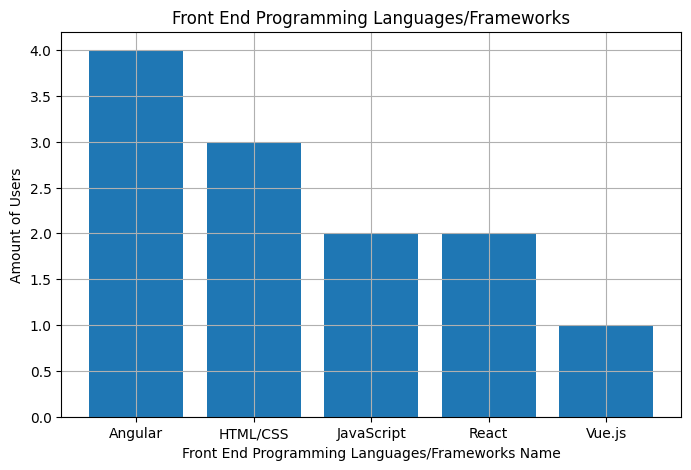

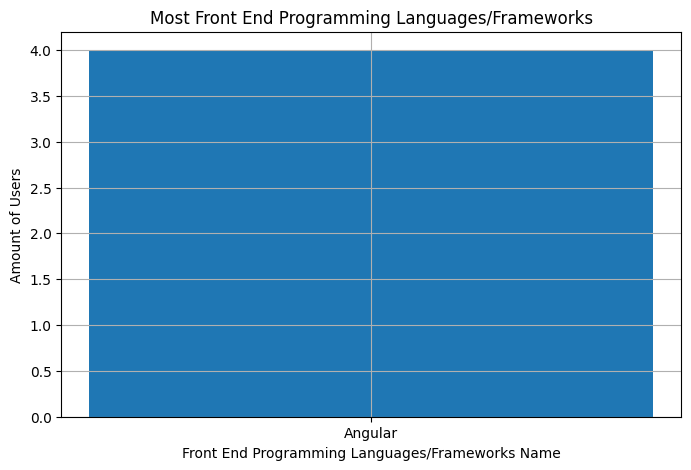

In [97]:
# Cara 1
framework_front_end_result = df_survey.groupby(["favorite_front_end"]).count()

framework_fe_name = framework_front_end_result.index.get_level_values(0).tolist()
framework_fe_count = framework_front_end_result["name"]

plt.figure(figsize=(8, 5))
plt.title("Front End Programming Languages/Frameworks")
plt.xlabel("Front End Programming Languages/Frameworks Name")
plt.ylabel("Amount of Users")
plt.bar(framework_fe_name, framework_fe_count)
plt.grid(True)
plt.show()

# cara 2
max_framework_fe_name = framework_front_end_result.idxmax()
max_framework_fe_count = framework_front_end_result.max()

plt.figure(figsize=(8, 5))
plt.title("Most Front End Programming Languages/Frameworks")
plt.xlabel("Front End Programming Languages/Frameworks Name")
plt.ylabel("Amount of Users")
plt.bar(max_framework_fe_name, max_framework_fe_count)
plt.grid(True)
plt.show()


- Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan back end.

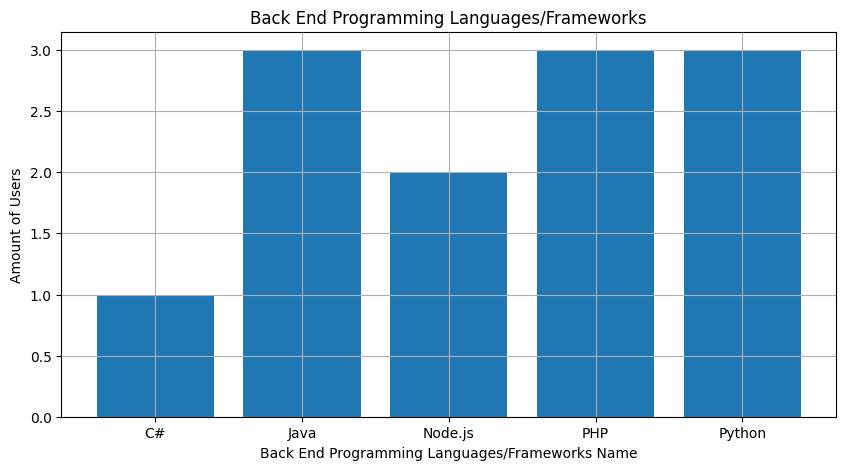

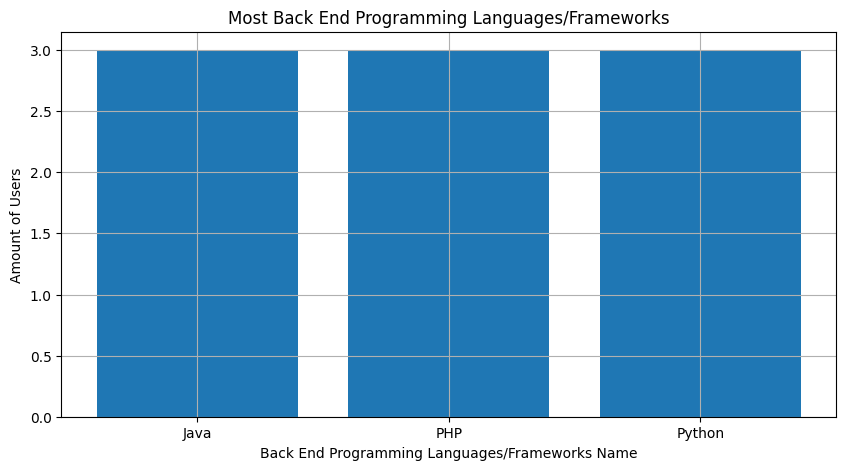

In [98]:
# Cara 1
framework_back_end_result = df_survey.groupby(["favorite_back_end"]).count()

framework_be_name = framework_back_end_result.index.get_level_values(0).tolist()
framework_be_count = framework_back_end_result["name"]

plt.figure(figsize=(10, 5))
plt.title("Back End Programming Languages/Frameworks")
plt.xlabel("Back End Programming Languages/Frameworks Name")
plt.ylabel("Amount of Users")
plt.bar(framework_be_name, framework_be_count)
plt.grid(True)
plt.show()

# cara 2
max_framework_be_count = framework_be_count.max()

max_frameworks = framework_back_end_result[framework_back_end_result["name"] == max_framework_be_count]
max_framework_be_name = max_frameworks.index.tolist()

plt.figure(figsize=(10, 5))
plt.title("Most Back End Programming Languages/Frameworks")
plt.xlabel("Back End Programming Languages/Frameworks Name")
plt.ylabel("Amount of Users")
plt.bar(max_framework_be_name, max_framework_be_count)
plt.grid(True)
plt.show()


- Persentase bahasa pemrograman / framework yang dipilih dalam pengembangan front end.

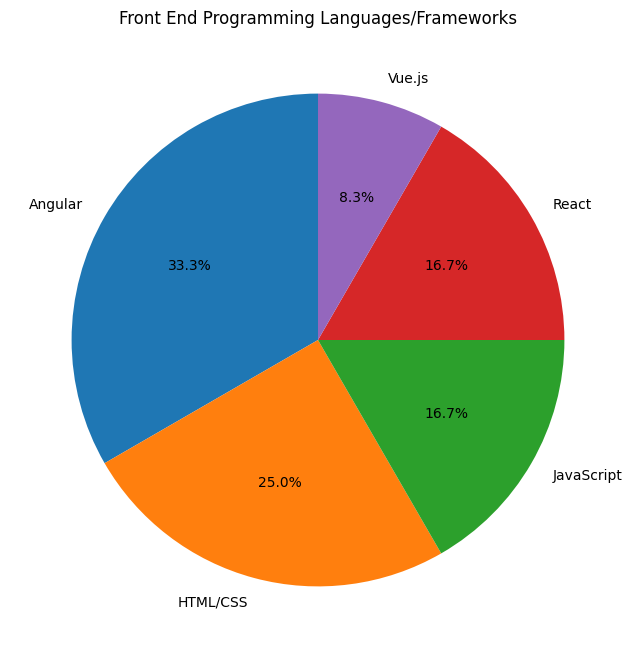

In [99]:
framework_front_end_result = df_survey.groupby(["favorite_front_end"]).count()

framework_fe_name = framework_front_end_result.index.get_level_values(0).tolist()
framework_fe_count = framework_front_end_result["name"]

plt.figure(figsize=(8, 8))
plt.title("Front End Programming Languages/Frameworks")
plt.pie(
    framework_fe_count, 
    labels=framework_fe_name,
    autopct="%1.1f%%",
    startangle=90,
)
plt.show()

- Rentangan gaji per tahun yang paling banyak berdasarkan hasil survei.

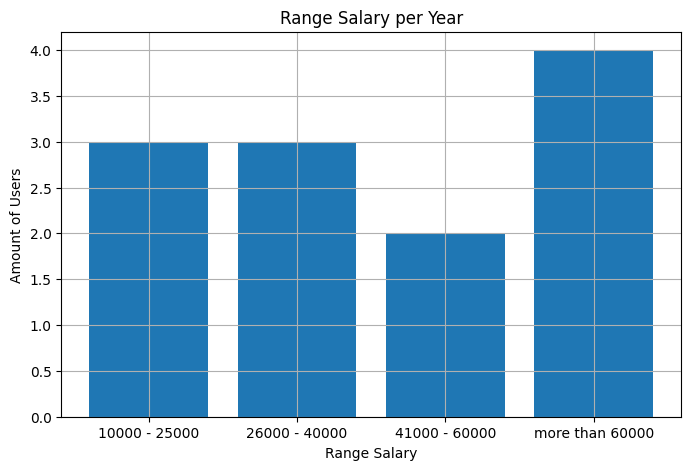

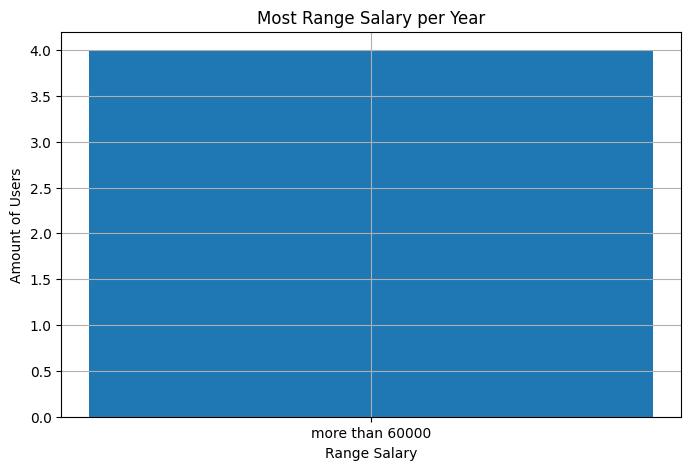

In [100]:
# Cara 1
salary_per_year_in_USD_result = df_survey.groupby(["salary_per_year_in_USD"]).count()

range_salary = salary_per_year_in_USD_result.index.get_level_values(0).tolist()
range_salary_count = salary_per_year_in_USD_result["name"]

plt.figure(figsize=(8, 5))
plt.title("Range Salary per Year")
plt.xlabel("Range Salary")
plt.ylabel("Amount of Users")
plt.bar(range_salary, range_salary_count)
plt.grid(True)
plt.show()

# cara 2
max_range_salary = salary_per_year_in_USD_result.idxmax()
max_range_salary_count = salary_per_year_in_USD_result.max()

plt.figure(figsize=(8, 5))
plt.title("Most Range Salary per Year")
plt.xlabel("Range Salary")
plt.ylabel("Amount of Users")
plt.bar(max_range_salary, max_range_salary_count)
plt.grid(True)
plt.show()
